# ARDA TURAN CS210 FALL'23 PROJECT
***
My project is aiming to give some valuable information about my listening habits and taste of songs while searching for a question that I have in my mind. This question is about the genres of musics that I put in my playlists. Also, I have got a playlist called 'Various' and it contains 389 songs from different artist, languages, etc. Additionally, I used this playlist as my project material because the importance of data has been significantly getting important and becoming widespread, especially after the pandemics. That is why I collected my data from a Spotify analyzer by scraping it. Also, I collected more general data about my account by requesting it from Spotify. Shortly, I used them in order to test my hypothesis, and see the shape of my data. I used different tecniques such as exploratory data analysis, various data visualization, and machine learning algorithms. In addition to this, I tested my null hypothesis by determining the p-value and comparing it with the significance level, so that I can whether reject it or not. I found out that my data is rational since I could be able to find the correct answer about rejecting or failing to reject my hypothesis correlating with my data. Additionally, I was shocked about the deviation, diversity, and number of types of genres. Other than that, I am quite happy with the results because of the fact that I see have a taste of music related to my moods. The distibution of my data is suitable for data projects since it does not depend on stereotypes.
***
Link of my presentation document:
***

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import bs4
import requests
from scipy.stats import binom_test
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials
#client_credentials_manager = SpotifyClientCredentials(client_id='491862eccb624461a90a6ec9a26c94d7', client_secret='342e7a81e01241799d0ff4a6319eaf82')
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


## Scraping my data

In [2]:
file_path = r'/Users/ardaturan/Desktop/index.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = bs4.BeautifulSoup(html_content, 'html.parser')
pretty_html = soup.prettify()

***

In [3]:
music_blocks = soup.findAll('tr', {'data-id-song': True})


In [4]:
def scrap_page(music_blocks):
    musicb_data = {}
    musicb_data["#"] = []
    musicb_data["Song"] = []
    musicb_data["Artist"] = []
    musicb_data["Popularity"] = []
    musicb_data["BPM"] = []
    musicb_data["Genres"] = []
    musicb_data["Parent Genres"] = []
    musicb_data["Album"] = []
    musicb_data["Album Date"] = []
    musicb_data["Time"] = []
    musicb_data["Dance"] = []
    musicb_data["Energy"] = []
    musicb_data["Acoustic"] = []
    musicb_data["Instrumental"] = []
    musicb_data["Happy"] = []
    musicb_data["Speech"] = []
    musicb_data["Live"] = []
    musicb_data["Loud"] = []
    musicb_data["Key"] = []
    musicb_data["Time Signature"] = []
    musicb_data["Added at"] = []
    musicb_data["Spotify Track Id"] = []
    musicb_data["Album Label"] = []
    musicb_data["Camelot"] = []
    musicb_data["Spotify Track Img"] = []
    musicb_data["Song Preview"] = []
    
    
    for music in music_blocks:
        music_index = music.find("td", {"class" : "td-number text-center"}).get_text()
        try:
            musicb_data["#"].append(music_index)
        except:
            musicb_data["#"].append("None")
        
        music_name = music.find("td", {"class" : "td-name"}).get_text()
        try:
            musicb_data["Song"].append(music_name)
        except:
            musicb_data["Song"].append("None")
            
        music_img = music.findAll("img", {"class" : "track-table-img"})
        for img in music_img:
            if img.get("src") is not None:
                image = img["src"]
        try:
            musicb_data["Spotify Track Img"].append(image)
        except:
            musicb_data["Spotify Track Img"].append("None")
            
        music_pre = music.findAll('div', {'class': 'track-list-item-right suggest-player-table suggest-player'})
        for pre in music_pre:
            if pre.get('data-previewurl') is not None:
                link = pre['data-previewurl']
        try:
            musicb_data["Song Preview"].append(link)
        except:
            musicb_data["Song Preview"].append("None")
        
        music_artist = music.find("td", {"class" : "td-number oferflow"}).get_text()
        try:
            musicb_data["Artist"].append(music_artist)
        except:
            musicb_data["Artist"].append("None")

        music_popularity0 = music.findAll("td", {"class" : "td-number text-center"})
        music_popularity = music_popularity0[1].get_text()
        try:
            musicb_data["Popularity"].append(music_popularity)
        except:
            musicb_data["Popularity"].append("None")

        music_BPM0 = music.findAll("td", {"class" : "td-number text-center"})
        music_BPM = music_BPM0[2].get_text()
        try:
            musicb_data["BPM"].append(music_BPM)
        except:
            musicb_data["BPM"].append("None")

        music_genres0 = music.findAll("td", {"class" : "td-number oferflow"})
        music_genres = music_genres0[1].get_text()
        try:
            musicb_data["Genres"].append(music_genres)
        except:
            musicb_data["Genres"].append("None")

        music_parent_genre0 = music.findAll("td", {"class": "td-number oferflow"})
        music_parent_genre = music_parent_genre0[2].get_text()
        try:
            musicb_data["Parent Genres"].append(music_parent_genre)
        except:
            musicb_data["Parent Genres"].append("None")

        music_album0 = music.findAll("td", {"class": "td-number oferflow"})
        music_album = music_album0[3].get_text()
        try:
            musicb_data["Album"].append(music_album)
        except:
            musicb_data["Album"].append("None")

        music_album_date0 = music.findAll("td", {"class" : "td-number text-center"})
        music_album_date = music_album_date0[3].get_text()
        try:
            musicb_data["Album Date"].append(music_album_date)
        except:
            musicb_data["Album Date"].append("None")

        music_time0 = music.findAll("td", {"class" : "td-number text-center"})
        music_time = music_time0[4].get_text()    
        try:
            musicb_data["Time"].append(music_time)
        except:
            musicb_data["Time"].append("None")

        music_dance0 = music.findAll("td", {"class" : "td-number text-center"})
        music_dance = music_dance0[5].get_text()  
        try:
            musicb_data["Dance"].append(music_dance)
        except:
            musicb_data["Dance"].append("None")

        music_energy0 = music.findAll("td", {"class" : "td-number text-center"})
        music_energy = music_energy0[6].get_text()    
        try:
            musicb_data["Energy"].append(music_energy)
        except:
            musicb_data["Energy"].append("None")

        music_acoustic0 = music.findAll("td", {"class" : "td-number text-center"})
        music_acoustic = music_acoustic0[7].get_text()    
        try:
            musicb_data["Acoustic"].append(music_acoustic)
        except:
            musicb_data["Acoustic"].append("None")

        music_instrumental0 = music.findAll("td", {"class" : "td-number text-center"})
        music_instrumental = music_instrumental0[8].get_text()    
        try:
            musicb_data["Instrumental"].append(music_instrumental)
        except:
            musicb_data["Instrumental"].append("None")

        music_happy0 = music.findAll("td", {"class" : "td-number text-center"})
        music_happy = music_happy0[9].get_text()    
        try:
            musicb_data["Happy"].append(music_happy)
        except:
            musicb_data["Happy"].append("None")

        music_speech0 = music.findAll("td", {"class" : "td-number text-center"})
        music_speech = music_speech0[10].get_text()    
        try:
            musicb_data["Speech"].append(music_speech)
        except:
            musicb_data["Speech"].append("None")

        music_live0 = music.findAll("td", {"class" : "td-number text-center"})
        music_live = music_live0[11].get_text()    
        try:
            musicb_data["Live"].append(music_live)
        except:
            musicb_data["Live"].append("None")

        music_loud0 = music.findAll("td", {"class" : "td-number text-center"})
        music_loud = music_loud0[12].get_text()     
        try:
            musicb_data["Loud"].append(music_loud)
        except:
            musicb_data["Loud"].append("None")

        music_key0 = music.findAll("td", {"class" : "td-number text-center"})
        music_key = music_key0[13].get_text()     
        try:
            musicb_data["Key"].append(music_key)
        except:
            musicb_data["Key"].append("None")

        music_time_signature0 = music.findAll("td", {"class" : "td-number text-center"})
        music_time_signature = music_time_signature0[14].get_text()     
        try:
            musicb_data["Time Signature"].append(music_time_signature)
        except:
            musicb_data["Time Signature"].append("None")

        music_added0 = music.findAll("td", {"class" : "td-number text-center"})
        music_added = music_added0[15].get_text()    
        try:
            musicb_data["Added at"].append(music_added)
        except:
            musicb_data["Added at"].append("None")

        music_spotify_trackid0 = music.findAll("td", {"class" : "td-number text-center"})
        music_spotify_trackid = music_spotify_trackid0[16].get_text()      
        try:
            musicb_data["Spotify Track Id"].append(music_spotify_trackid)
        except:
            musicb_data["Spotify Track Id"].append("None")

        music_album_label0 = music.findAll("td", {"class" : "td-number text-center"})
        music_album_label = music_album_label0[17].get_text()      
        try:
            musicb_data["Album Label"].append(music_album_label)
        except:
            musicb_data["Album Label"].append("None")

        music_camelot0 = music.findAll("td", {"class" : "td-number text-center"})
        music_camelot = music_camelot0[18].get_text()      
        try:
            musicb_data["Camelot"].append(music_camelot)
        except:
            musicb_data["Camelot"].append("None")

    return musicb_data


In [5]:
def scrape_m_page(music_blocks):
    page_music_data = []
    
    num_blocks = len(music_blocks)
    
    for idx in range(num_blocks):
        page_music_data.append(scrape_mblock(music_blocks[idx]))
        
    return page_music_data


In [6]:
#base_scraping_link = r'/Users/ardaturan/Desktop/SABANCI/Sophomore 2/CS 210/HW1/CS210 - Homework 1 - for BeautifulSoup.html'

music_list = []

music = scrap_page(music_blocks)
df = pd.DataFrame(music)

df = df.rename(index = lambda x: x + 1)

df


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
1,1,The Power of Love,Céline Dion,73,140,canadian pop,Pop,The Colour Of My Love,1993-11-09,05:42,...,20,-9 db,G#/A♭ Major,4,2023-12-10,5kK1Iru9ogP3Iy1zsANU1n,Columbia,4B,https://i.scdn.co/image/ab67616d00004851b3d0e0...,https://p.scdn.co/mp3-preview/7d88cb368e189a99...
2,2,Love In Portofino,Andrea Bocelli,49,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Love In Portofino,2013-01-01,03:00,...,0,-10 db,C Minor,4,2023-12-10,34btMnuONjpqdibkFGvFz5,Universal Music Group International,5A,https://i.scdn.co/image/ab67616d00004851435af4...,null
3,3,Bésame Mucho,"Consuelo Velázquez,Andrea Bocelli",58,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Amor (Spanish Edition / Remastered),2006-01-01,04:01,...,10,-9 db,F Minor,4,2023-12-10,5WHnE8MsLFHqSUwecrs7WO,Universal Music Group International,4A,https://i.scdn.co/image/ab67616d000048517068ff...,null
4,4,Con te partirò,Andrea Bocelli,37,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,0,-8 db,G Major,4,2023-12-10,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B,https://i.scdn.co/image/ab67616d000048512f2b98...,null
5,5,L'italiano,Toto Cutugno,71,121,classic italian pop,Pop,L'Italiano,1983-02-01,03:56,...,40,-11 db,A#/B♭ Minor,4,2023-12-10,2S7RApTsKT0CtYojYq2cKz,Carosello Records,3A,https://i.scdn.co/image/ab67616d00004851d919d1...,https://p.scdn.co/mp3-preview/75200ca2b1076f59...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,Минимал,Eldzhey,55,110,"russian hip hop, russian pop","Hip Hop, Pop",Sayonara Boy X,2018-03-27,03:22,...,10,-8 db,A#/B♭ Major,4,2023-12-10,3S0x65t4UEMl0voKHXdSev,Zion Music,6B,https://i.scdn.co/image/ab67616d00004851798881...,https://p.scdn.co/mp3-preview/a7866f666e365ee7...
386,386,Дисконнект,"Eldzhey,Kravz",51,120,"russian hip hop, russian pop","Hip Hop, Pop",Sayonara Boy,2016-10-07,03:54,...,20,-7 db,C Major,4,2023-12-10,2ljYT3DjHXVrygwDbNjm4n,Cream&Nal Records,8B,https://i.scdn.co/image/ab67616d00004851655135...,https://p.scdn.co/mp3-preview/2bbe8fa026ab2252...
387,387,1love,Eldzhey,37,112,"russian hip hop, russian pop","Hip Hop, Pop",1love,2018-07-20,03:10,...,10,-4 db,C♯/D♭ Major,4,2023-12-10,05TQ1Go0lWyuG8p1sQofxR,Zion Music,3B,https://i.scdn.co/image/ab67616d00004851a3bbfa...,https://p.scdn.co/mp3-preview/fb77994bd50daeab...
388,388,NBA (Rompasso Remix),"RSAC,Rompasso",41,120,"russian alt pop, russian indie, g-house, pop e...","Electronic, Pop",NBA (Remixes),2019-06-28,02:53,...,10,-6 db,E Major,3,2023-12-10,5O2OHty6ijfKDN3twVWJRC,We are communa,12B,https://i.scdn.co/image/ab67616d000048515afd45...,https://p.scdn.co/mp3-preview/98b7ac89b7ebdb8f...


***
# Exploring my Dataset (EDA) & Preprocessing

***
Let's learn more about my dataset. In this part, you will see the shape of my dataset.

In [7]:
print("Number of columns (features) are:", df.shape[1])
print("Number of rows (samplings) are:", df.shape[0])


Number of columns (features) are: 26
Number of rows (samplings) are: 389


In [61]:
df.shape

(11, 1)

***

In [8]:
df.describe().transpose()


,count,unique,top,freq
#,389,389,1,1
Song,389,388,Мир сошёл с ума,2
Artist,389,285,Travis Scott,10
Popularity,389,77,56,13
BPM,389,98,120,21
Genres,389,215,russian pop,25
Parent Genres,389,61,Pop,94
Album,389,341,ASTROWORLD,4
Album Date,389,301,2018-08-03,6
Time,389,177,03:53,8


***

In [9]:
print("Each columns' non-null counts and their data types: \n")

df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']] = df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']].apply(pd.to_numeric)
df['Loud'] = df['Loud'].str.extract('(-?\d+)').astype(int)

df.info()


Each columns' non-null counts and their data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1 to 389
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  389 non-null    int64 
 1   Song               389 non-null    object
 2   Artist             389 non-null    object
 3   Popularity         389 non-null    int64 
 4   BPM                389 non-null    int64 
 5   Genres             389 non-null    object
 6   Parent Genres      389 non-null    object
 7   Album              389 non-null    object
 8   Album Date         389 non-null    object
 9   Time               389 non-null    object
 10  Dance              389 non-null    int64 
 11  Energy             389 non-null    int64 
 12  Acoustic           389 non-null    int64 
 13  Instrumental       389 non-null    int64 
 14  Happy              389 non-null    int64 
 15  Speech             389 non-null    int64 


***
Checking if there is any null row.
***
**Fact:** You see there is no empty row which is a good feature in terms of avoiding the one from getting weird results when implementing Machine Learning models.

In [10]:
print("Getting how many rows are null for each feature: \n", df.isna().sum())


Getting how many rows are null for each feature: 
 #                    0
Song                 0
Artist               0
Popularity           0
BPM                  0
Genres               0
Parent Genres        0
Album                0
Album Date           0
Time                 0
Dance                0
Energy               0
Acoustic             0
Instrumental         0
Happy                0
Speech               0
Live                 0
Loud                 0
Key                  0
Time Signature       0
Added at             0
Spotify Track Id     0
Album Label          0
Camelot              0
Spotify Track Img    0
Song Preview         0
dtype: int64


Here is the variable names.

In [11]:
print("Variable names: ")
print(df.columns.tolist(), "\n")

Variable names: 
['#', 'Song', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres', 'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Key', 'Time Signature', 'Added at', 'Spotify Track Id', 'Album Label', 'Camelot', 'Spotify Track Img', 'Song Preview'] 



***
I removed 'Spotify Track Img' and 'Song Preview' columns since they have no contribution to ordering.

In [12]:
df.drop(['Spotify Track Img'], axis = 1, inplace=True)
df.drop(['Song Preview'], axis = 1, inplace=True)

df.head()


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
1,1,The Power of Love,Céline Dion,73,140,canadian pop,Pop,The Colour Of My Love,1993-11-09,05:42,...,25,0,20,-9,G#/A♭ Major,4,2023-12-10,5kK1Iru9ogP3Iy1zsANU1n,Columbia,4B
2,2,Love In Portofino,Andrea Bocelli,49,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Love In Portofino,2013-01-01,03:00,...,36,0,0,-10,C Minor,4,2023-12-10,34btMnuONjpqdibkFGvFz5,Universal Music Group International,5A
3,3,Bésame Mucho,"Consuelo Velázquez,Andrea Bocelli",58,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Amor (Spanish Edition / Remastered),2006-01-01,04:01,...,38,0,10,-9,F Minor,4,2023-12-10,5WHnE8MsLFHqSUwecrs7WO,Universal Music Group International,4A
4,4,Con te partirò,Andrea Bocelli,37,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,28,0,0,-8,G Major,4,2023-12-10,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B
5,5,L'italiano,Toto Cutugno,71,121,classic italian pop,Pop,L'Italiano,1983-02-01,03:56,...,69,0,40,-11,A#/B♭ Minor,4,2023-12-10,2S7RApTsKT0CtYojYq2cKz,Carosello Records,3A


***
Since I have finished investigating recurring or null values, I move on with the most interesting part, which is the sorting.
***
First, I start with the most popular songs.

In [13]:
a= df.sort_values('Popularity',ascending=False)[:10]
a[['Song','Popularity','Artist','Genres']]


,Song,Popularity,Artist,Genres
218,Popular (with Playboi Carti & Madonna) - M...,95,"The Weeknd,Playboi Carti,Madonna","canadian contemporary r&b, canadian pop, pop, ..."
213,Die For You,91,The Weeknd,"canadian contemporary r&b, canadian pop, pop"
301,FE!N (feat. Playboi Carti),91,"Travis Scott,Playboi Carti","hip hop, rap, slap house, atl hip hop, plugg, ..."
179,The Hills,90,The Weeknd,"canadian contemporary r&b, canadian pop, pop"
196,Skyfall,89,Adele,"british soul, pop, pop soul, uk pop"
276,goosebumps,89,Travis Scott,"hip hop, rap, slap house"
76,Dancing Queen,88,ABBA,"europop, swedish pop"
191,Under The Influence,88,Chris Brown,"r&b, rap"
180,Call Out My Name,88,The Weeknd,"canadian contemporary r&b, canadian pop, pop"
207,Escapism.,87,"RAYE,070 Shake","uk contemporary r&b, uk pop, new jersey rap"


***
Now, the least popular ones.

In [14]:
a= df.sort_values('Popularity',ascending=True)[0:10]
a[['Song','Popularity','Artist', 'Genres']]


,Song,Popularity,Artist,Genres
384,Юность,0,Dabro,"russian dance, russian hip hop, russian pop"
37,City Livin',2,GLOFLY,
38,luwit,2,COLCO,
41,Cinerama,2,Midnight Daydream,
35,Bao,2,Moledro,
34,Bibimbap,3,Constantine,
33,The Remedy,4,Calming Hearts,
49,New Light,4,Orchid City,
36,wind in my sails,9,linanthem,chillhop
55,Speed Of Light (Fiva Bros Remix),9,"Max Melvin,Fiva Bros","chill lounge, deep chill,"


***
This is about our hypothesis.

In [15]:
df['Genres'] = df['Genres'].str.split(', ')
genre_counts = df.explode('Genres')['Genres'].value_counts()

top_10_genres = genre_counts.head(10)
top_10_genres


Genres
rap              87
russian pop      83
hip hop          70
pop              67
pop rap          52
trap             49
turkish pop      43
dance pop        40
atl hip hop      35
russian dance    33
Name: count, dtype: int64

***
These are the top genres of my playlist but lets see whether they are also in the list that is ordered with respect to the popularity.

In [16]:
df_exploded = df.explode('Genres')

average_popularity = df_exploded.groupby('Genres')['Popularity'].agg(['mean', 'size'])

popular_genres = average_popularity[average_popularity['size'] > 0]

popular_genres = popular_genres.rename(columns={'mean': 'Popularity Score'})

top_genres = popular_genres.nlargest(10, 'Popularity Score')

print("Top 10 Genres with Average Popularity Score:")
top_genres[['Popularity Score']]


Top 10 Genres with Average Popularity Score:


,Popularity Score
Genres,
pluggnb,93.00
pop soul,89.00
new jersey rap,87.00
deep dance pop,86.00
canadian contemporary r&b,85.75
alternative dance,84.00
aussietronica,84.00
australian electropop,84.00
birmingham grime,84.00


***
Now here you see my best song. I hope you like it.

In [17]:
for i in range(len(music["Song"])):
    music["Song"][i] = music["Song"][i].lstrip("  ")

df = pd.DataFrame(music)
df = df.rename(index = lambda x: x + 1)
df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']] = df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']].apply(pd.to_numeric)
df['Loud'] = df['Loud'].str.extract('(-?\d+)').astype(int)

#df['Popularity_Category'] = df['Popularity'].apply(categorize_popularity)
#df['BPM_Category'] = df['BPM'].apply(categorize_bpm)

filtered_df = df[df.Song == "Die For You"]
filtered_df

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
213,213,Die For You,The Weeknd,91,134,"canadian contemporary r&b, canadian pop, pop","R&B, Pop",Starboy,2016-11-24,04:20,...,10,-7,C♯/D♭ Minor,4,2023-12-10,2LBqCSwhJGcFQeTHMVGwy3,Universal Republic Records,12A,https://i.scdn.co/image/ab67616d00004851a04841...,null


***
With this code, you can search for the name of a song in a specific line.

In [18]:
df[['Artist']].iloc[1]

Artist    Andrea Bocelli
Name: 2, dtype: object

***
Last but not least, here is the most common album.

In [19]:
album_counts = df['Album'].value_counts()

most_common_album = album_counts.idxmax()

print(f"The name of the most common album among tracks: ")

most_common_album


The name of the most common album among tracks: 


'ASTROWORLD'

In [20]:
def categorize_happy(happy):
    if happy < 30:
        return 'Miserable'
    elif 30 <= happy <= 70:
        return 'Average'
    else:
        return 'Joyful'
    
def categorize_popularity(popularity):
    if popularity > df['Popularity'].quantile(0.75):
        return 'High'
    elif popularity >= df['Popularity'].quantile(0.25):
        return 'Medium'
    else:
        return 'Low'
    
#def categorize_genres(genres):
 #   if genres in ['hip hop', 'pop', 'electronic', 'jazz', 'r&b', 'latin', 'classical', 'easy listening', 'world/traditional', 'folk/accoustic', 'new age', 'country', 'metal' ]:
  #      return True
   # else:
    #    return False
    
df['Popularity_Category'] = df['Popularity'].apply(categorize_popularity)

df['Popularity_Category'] = df['Popularity'].apply(categorize_popularity)
df['Happiness_Category'] = df['Happy'].apply(categorize_happy)
#df['Genres_Category'] = df['Genres'].apply(categorize_genres)

df['Popularity_Category'].value_counts(), df['Happiness_Category'].value_counts()#, df['Genres_Category'].value_counts()

(Popularity_Category
 Medium    199
 High       96
 Low        94
 Name: count, dtype: int64,
 Happiness_Category
 Average      229
 Miserable    112
 Joyful        48
 Name: count, dtype: int64)

# Data Visualization and Analysis

I use scattered plot to see the deviation of my data.

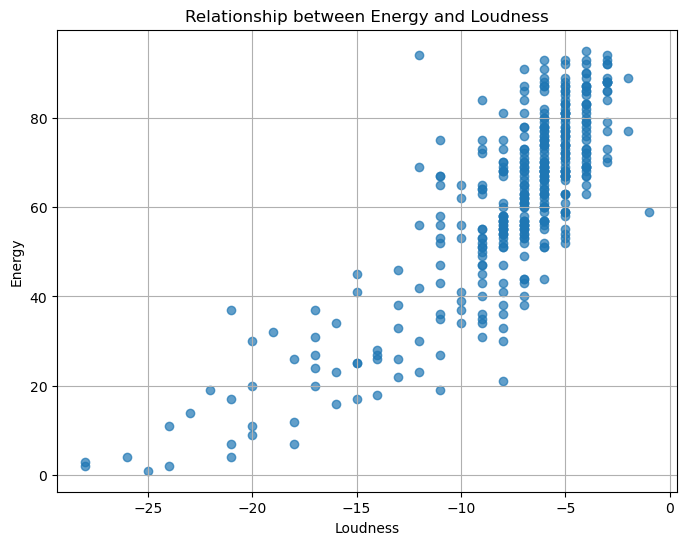

In [21]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Loud'], df['Energy'], alpha = 0.7)

plt.title('Relationship between Energy and Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')

#plt.xlim(-20, -2)
#plt.ylim(0, 100)

plt.grid(True)

plt.show()    


Now, I plot my special categories named as Happiness, Popularity category.

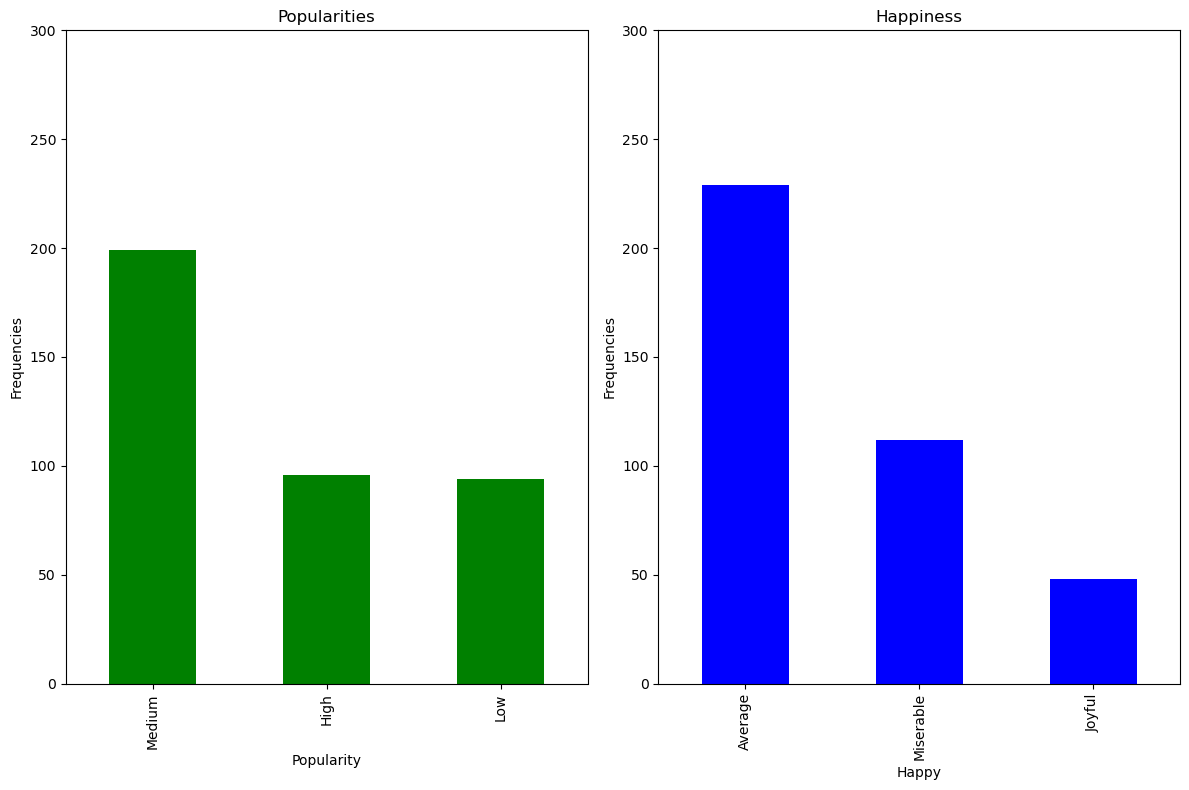

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

df['Happiness_Category'].value_counts().plot(kind="bar", color="blue", ax = axs[1])
axs[1].set_title('Happiness')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('Happy')
axs[1].set_ylim([0, 300])

df['Popularity_Category'].value_counts().plot(kind="bar", color="green", ax = axs[0])
axs[0].set_title('Popularities')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylim([0, 300])

plt.tight_layout()

plt.show()


I assign a new variable again to have a better visualization examples over my data.

In [23]:
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

df['Month'] = df['Album Date'].dt.month

avg_popularity_by_month = df.groupby('Month')['Popularity'].mean()

df.head()

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview,Popularity_Category,Happiness_Category,Month
1,1,The Power of Love,Céline Dion,73,140,canadian pop,Pop,The Colour Of My Love,1993-11-09,05:42,...,4,2023-12-10,5kK1Iru9ogP3Iy1zsANU1n,Columbia,4B,https://i.scdn.co/image/ab67616d00004851b3d0e0...,https://p.scdn.co/mp3-preview/7d88cb368e189a99...,High,Miserable,11.0
2,2,Love In Portofino,Andrea Bocelli,49,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Love In Portofino,2013-01-01,03:00,...,4,2023-12-10,34btMnuONjpqdibkFGvFz5,Universal Music Group International,5A,https://i.scdn.co/image/ab67616d00004851435af4...,null,Medium,Average,1.0
3,3,Bésame Mucho,"Consuelo Velázquez,Andrea Bocelli",58,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Amor (Spanish Edition / Remastered),2006-01-01,04:01,...,4,2023-12-10,5WHnE8MsLFHqSUwecrs7WO,Universal Music Group International,4A,https://i.scdn.co/image/ab67616d000048517068ff...,null,Medium,Average,1.0
4,4,Con te partirò,Andrea Bocelli,37,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,4,2023-12-10,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B,https://i.scdn.co/image/ab67616d000048512f2b98...,null,Low,Miserable,1.0
5,5,L'italiano,Toto Cutugno,71,121,classic italian pop,Pop,L'Italiano,1983-02-01,03:56,...,4,2023-12-10,2S7RApTsKT0CtYojYq2cKz,Carosello Records,3A,https://i.scdn.co/image/ab67616d00004851d919d1...,https://p.scdn.co/mp3-preview/75200ca2b1076f59...,Medium,Average,2.0


Now, I use our new variable to see the monthly distribution.

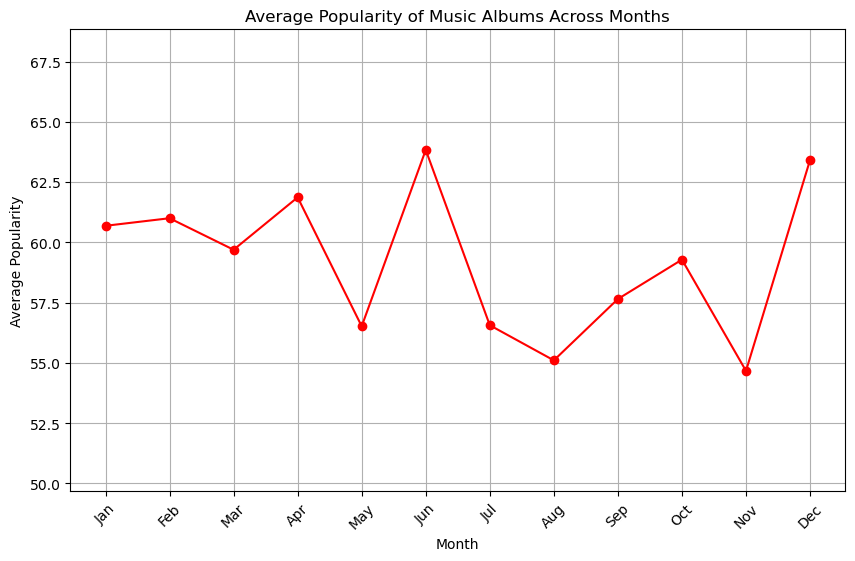

In [24]:
custom_month_order = [calendar.month_abbr[i] for i in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.plot(avg_popularity_by_month.index, avg_popularity_by_month.values, marker='o', linestyle='-', color = "red")

plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Across Months')
plt.xticks(range(1, 13), custom_month_order)  # Use actual month numbers for x-axis ticks

plt.ylim(avg_popularity_by_month.min() - 5, avg_popularity_by_month.max() + 5)

plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Here is the barplot of top genres according to their popularity levels.

/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Top Genres by Popularity')]

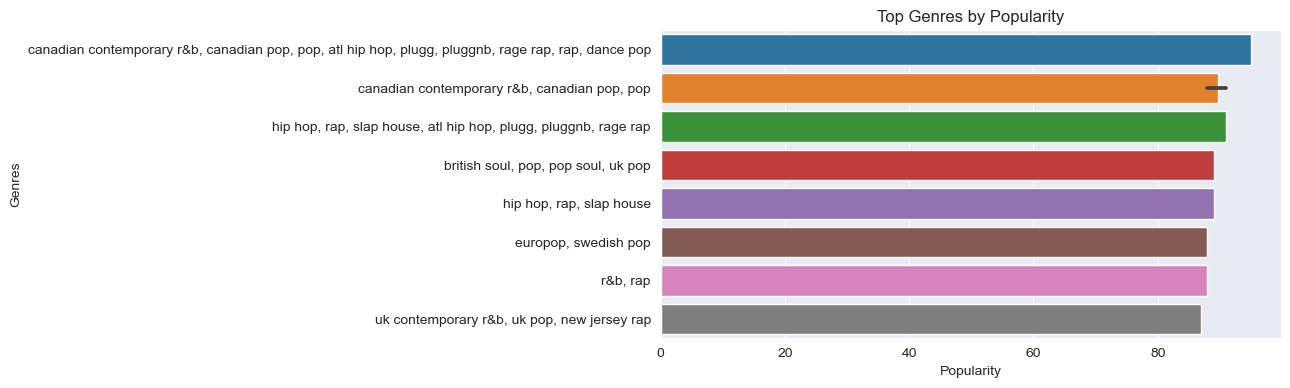

In [25]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,4))
Top = df.sort_values('Popularity', ascending=False)[:10]
sns.barplot(y = 'Genres', x = 'Popularity', data = Top).set(title='Top Genres by Popularity')


Also the genres with the least popularities.

/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Top Genres by Popularity')]

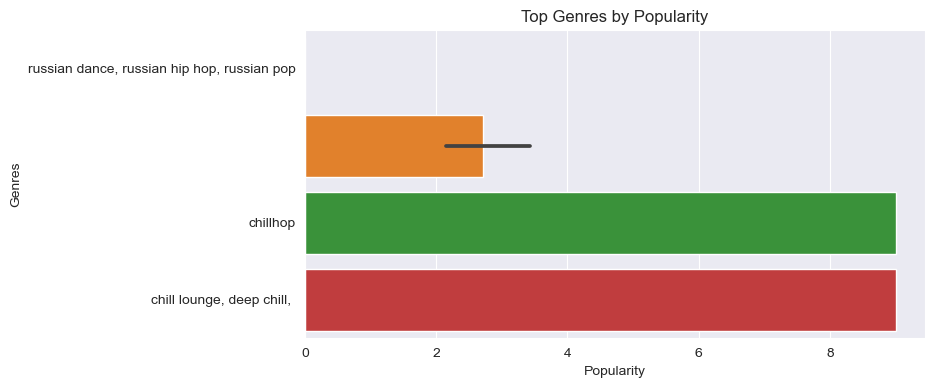

In [26]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,4))
Top = df.sort_values('Popularity', ascending=True)[:10]
sns.barplot(y = 'Genres', x = 'Popularity', data = Top).set(title='Top Genres by Popularity')

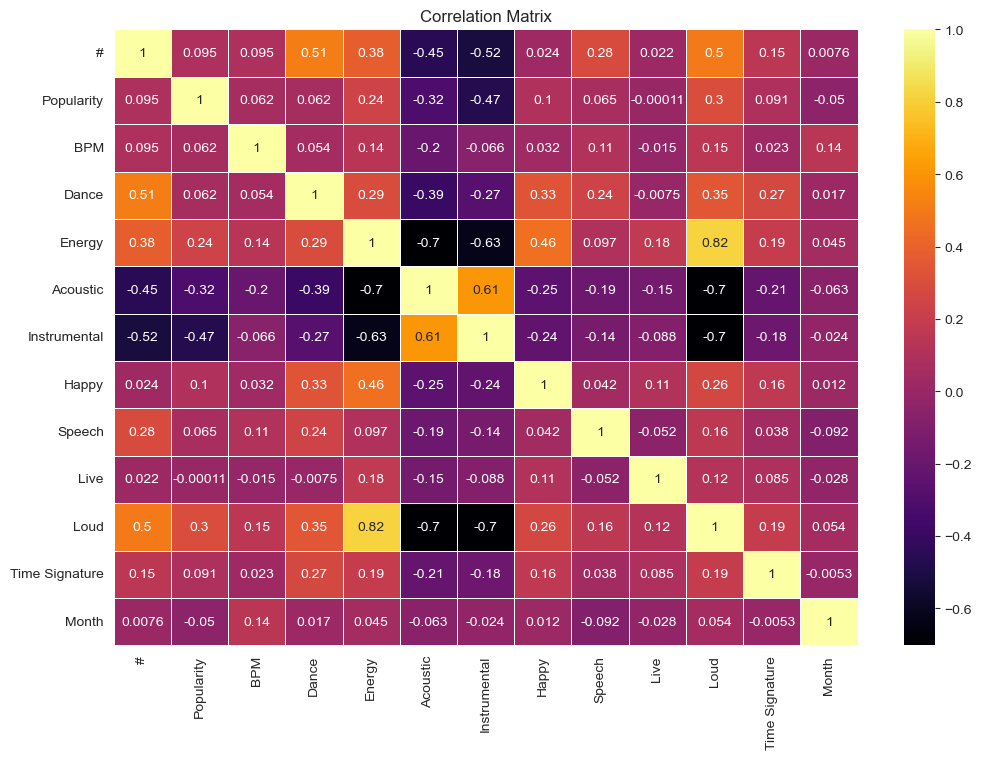

In [27]:
df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']] = df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']].apply(pd.to_numeric)

numerical_columns = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=.5, ax=ax)

plt.title("Correlation Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

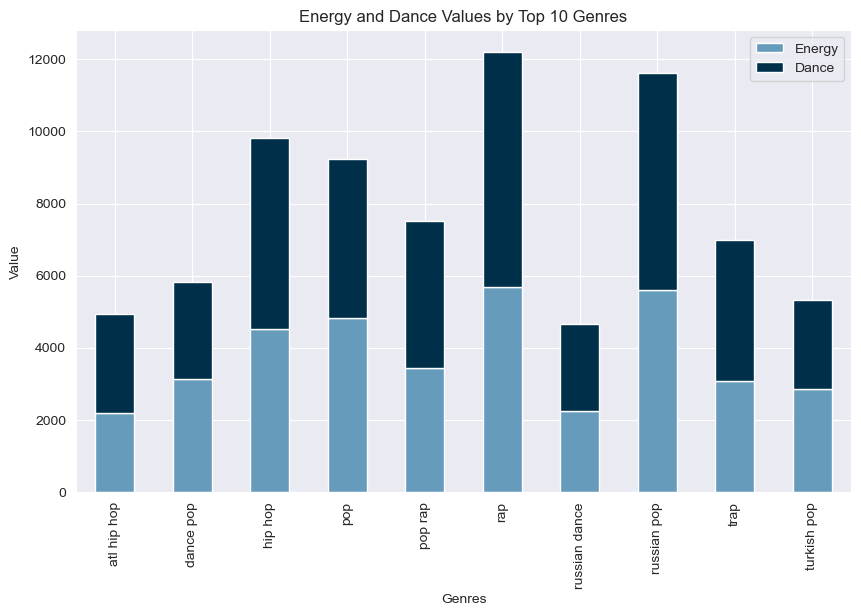

In [28]:
expanded_genres = df['Genres'].str.split(', ').explode()
top_10_genres = expanded_genres.value_counts().head(10).index

# Creating a new dataframe that maps songs to each genre they belong to
genre_mappings = expanded_genres.reset_index().merge(df[['Energy', 'Dance']], left_on='index', right_index=True)
genre_mappings = genre_mappings[genre_mappings['Genres'].isin(top_10_genres)]

aggregated_values = genre_mappings.groupby('Genres').agg({'Energy': 'sum', 'Dance': 'sum'})
plt.figure(figsize=(10, 6))
aggregated_values.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'], figsize=(10, 6))
plt.title('Energy and Dance Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Value')
#plt.xticks(rotation=45)
plt.show()

/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


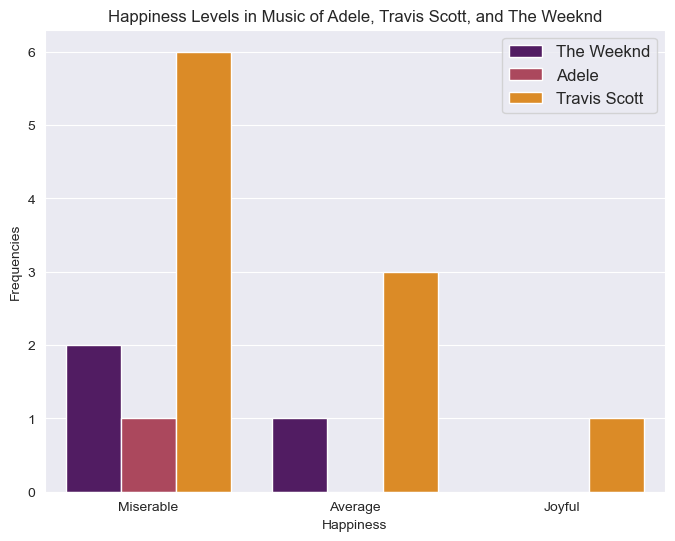

In [29]:
filtered_artists = {}
filtered_artists["Artist"] = []
filtered_artists["Happy"] = []

for i in range(len(df)):
    if df['Artist'].iloc[i] == 'Adele' or df['Artist'].iloc[i] == 'Travis Scott' or df['Artist'].iloc[i] == 'The Weeknd':
        filtered_artists['Artist'].append(df['Artist'].iloc[i])
        filtered_artists['Happy'].append(df['Happy'].iloc[i])
        
filtered_artists_df = pd.DataFrame(filtered_artists)
filtered_artists_df = filtered_artists_df.rename(index = lambda x: x + 1)
#filtered_artists_df['Popularity_Category'] = filtered_artists_df['Popularity'].apply(categorize_popularity)
filtered_artists_df['Happiness_Category'] = filtered_artists_df['Happy'].apply(categorize_happy)

plt.figure(figsize = (8, 6))
sns.countplot(x = "Happiness_Category", hue = "Artist", data = filtered_artists_df, palette = "inferno", order = ["Miserable", "Average", "Joyful"])
#plt.hist(filtered_artists_df[['Artist', 'BPM_Category']], density=True, histtype='bar', color = ["red", "blue"], label=artists)

plt.legend(prop = {'size': 12})
plt.title('Happiness Levels in Music of Adele, Travis Scott, and The Weeknd')
plt.xlabel("Happiness")
plt.ylabel('Frequencies')
plt.show()

# Hypothesis Testing

My null Hypothesis: I do not listen to music from at least 10 different genres.
***
Alternative Hypothesis: I listen to music from at least 10 different genres.

In [ ]:
genres = df['Genres']

num_unique_genres = genres.nunique()

threshold_genres = 10

p_value = binom_test(num_unique_genres, n=len(genres), p=0.5)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(y='Genres', data=df, order=df['Genres'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genres')

plt.text(0.5, -1, f'P-value: {p_value:.4f}', ha='center', va='center', fontsize=12, color='red')

#plt.savefig('genre_distribution.png')
plt.show()

/var/folders/_6/xf5286jn2x768xy1xr0l5xy40000gn/T/ipykernel_18503/299902217.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(num_unique_genres, n=len(genres), p=0.5)
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ardaturan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [31]:
genres = df['Genres']

num_unique_genres = genres.nunique()

threshold_genres = 100

p_value = binom_test(num_unique_genres, n=len(genres), p=0.5)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. You listen to music from at least 10 different genres.")
else:
    print("Fail to reject the null hypothesis. You may not listen to music from at least 10 different genres.")

print("P-value:", p_value)


Reject the null hypothesis. You listen to music from at least 10 different genres.
P-value: 0.04241378300143048


/var/folders/_6/xf5286jn2x768xy1xr0l5xy40000gn/T/ipykernel_18503/2747992402.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(num_unique_genres, n=len(genres), p=0.5)


# Machine Learning

I mapped columns that are categorical, into numerical data with LabelEncoder library due to the fact that ML systems may fail.


In [32]:
le = LabelEncoder()

for col in df.columns:
  if col == 'Song' or col == 'Artist' or col == 'Genres' or col=='Parent Genres' or col == 'Album' or col == 'Album Date' or col == 'Time' or col == 'Key' or col == 'Time Signature' or col == 'Added at' or col == 'Spotify Track Id' or col == 'Album Label' or col == 'Camelot' or col == 'Spotify Track Img' or col == 'Song Preview' or col == 'Popularity_Category' or col == 'Happiness_Category' or col == 'Month':
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df.head()
     

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview,Popularity_Category,Happiness_Category,Month
1,1,255,56,73,140,61,34,234,14,161,...,2,0,280,45,13,236,152,0,2,10
2,2,156,17,49,95,74,5,142,68,52,...,2,0,156,166,14,73,300,2,0,0
3,3,57,53,58,95,74,5,17,39,110,...,2,0,272,166,12,140,300,2,0,0
4,4,72,17,37,102,74,5,192,18,118,...,2,0,315,166,23,54,300,1,2,0
5,5,147,251,71,121,72,34,130,5,105,...,2,0,125,36,10,283,140,2,0,1


***
I dropped some columns that I cannot use.

In [33]:
df_ml = df.drop('Spotify Track Img', axis=1)


In [34]:
df_ml = df.drop('Song Preview', axis=1)


In [35]:
df_ml = df.drop('Album Date', axis=1)


In [36]:
df_ml = df.drop('Key', axis=1)


In [37]:
df_ml = df.drop('Time', axis=1)


In [38]:
df_ml = df.drop('Added at', axis=1)


In [39]:
df_ml.head()


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Key,Time Signature,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview,Popularity_Category,Happiness_Category,Month
1,1,255,56,73,140,61,34,234,14,161,...,22,2,280,45,13,236,152,0,2,10
2,2,156,17,49,95,74,5,142,68,52,...,7,2,156,166,14,73,300,2,0,0
3,3,57,53,58,95,74,5,17,39,110,...,17,2,272,166,12,140,300,2,0,0
4,4,72,17,37,102,74,5,192,18,118,...,20,2,315,166,23,54,300,1,2,0
5,5,147,251,71,121,72,34,130,5,105,...,3,2,125,36,10,283,140,2,0,1


#Supervised learning

In [40]:
missing_values = df.isnull().sum()
print("Missing values: ")
print(missing_values, "\n")

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Split the data into training and test sets (80% training, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Missing values: 
#                      0
Song                   0
Artist                 0
Popularity             0
BPM                    0
Genres                 0
Parent Genres          0
Album                  0
Album Date             0
Time                   0
Dance                  0
Energy                 0
Acoustic               0
Instrumental           0
Happy                  0
Speech                 0
Live                   0
Loud                   0
Key                    0
Time Signature         0
Added at               0
Spotify Track Id       0
Album Label            0
Camelot                0
Spotify Track Img      0
Song Preview           0
Popularity_Category    0
Happiness_Category     0
Month                  0
dtype: int64 



In [41]:
shuffled_df = shuffle(df, random_state=42)  # Shuffle the DataFrame

# Independent variables (X) and dependent variable (y)
#X = shuffled_df.drop(columns=['health_metrics'], axis=1)

X = shuffled_df.drop('Genres', axis=1)        # X contains all columns except 'health_metrics', .drop('health_metrics', axis=1)
y = shuffled_df['Genres']

# Splitting into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (311, 28)
Shape of X_test: (78, 28)
Shape of y_train: (311,)
Shape of y_test: (78,)


[Text(0.5, 1.0, 'Regression Plot - Popularity vs BPM Correlation')]

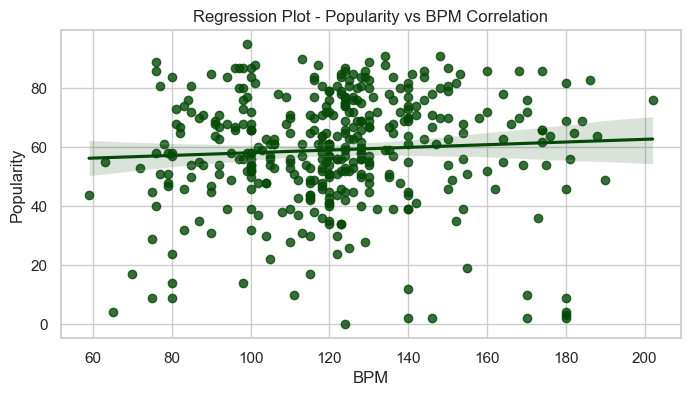

In [44]:
plt.figure(figsize=(8,4))
sns.regplot(data= df, y='Popularity', x='BPM', color='#054907').set(title='Regression Plot - Popularity vs BPM Correlation')

# Extra 
As I stated before, the data that I received from Spotify has no information about genre of a song. In this part, I used that Spotify data as an extra study on my project.

## EDA & Visualization

In [103]:
import json

with open('Playlist1.json', 'r') as file:
    data = json.load(file)

playlists = data.get('playlists', [])
df = pd.DataFrame(playlists)
print(data)

{'playlists': [{'name': 'Various', 'lastModifiedDate': '2023-12-10', 'items': [{'track': {'trackName': 'The Power of Love', 'artistName': 'Céline Dion', 'albumName': 'The Colour Of My Love', 'trackUri': 'spotify:track:5kK1Iru9ogP3Iy1zsANU1n'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-12-10'}, {'track': {'trackName': 'Love In Portofino', 'artistName': 'Andrea Bocelli', 'albumName': 'Love In Portofino', 'trackUri': 'spotify:track:34btMnuONjpqdibkFGvFz5'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-12-10'}, {'track': {'trackName': 'Bésame Mucho', 'artistName': 'Consuelo Velázquez', 'albumName': 'Amor', 'trackUri': 'spotify:track:5WHnE8MsLFHqSUwecrs7WO'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-12-10'}, {'track': {'trackName': 'Con te partirò', 'artistName': 'Andrea Bocelli', 'albumName': 'Romanza', 'trackUri': 'spotify:track:6T720JbJdg8lB5kqfvh5mk'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-12-10'}, {'track': {'trackName': "L'ital

In [104]:
df.head()

,name,lastModifiedDate,items,description,numberOfFollowers
0,Various,2023-12-10,"[{'track': {'trackName': 'The Power of Love', ...",None,0
1,KLASİK,2023-09-27,"[{'track': {'trackName': 'The Power of Love', ...",None,1
2,PAINULLAH,2023-11-10,"[{'track': {'trackName': 'Firuze', 'artistName...",None,1
3,РУСКИ,2023-12-10,[{'track': {'trackName': 'Минимум - Ramzan Abi...,None,0
4,TR,2023-11-15,"[{'track': {'trackName': 'Bir Derdim Var', 'ar...",None,2


In [105]:
df.shape

(11, 5)

In [106]:
print("Variable names: ")
print(df.columns.tolist(), "\n")

Variable names: 
['name', 'lastModifiedDate', 'items', 'description', 'numberOfFollowers'] 



In [107]:
df.describe()

,numberOfFollowers
count,11.000000
mean,0.636364
std,0.674200
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [108]:
print("Getting how many rows are null for each feature: \n", df.isna().sum())

Getting how many rows are null for each feature: 
 name                  0
lastModifiedDate      0
items                 0
description          11
numberOfFollowers     0
dtype: int64


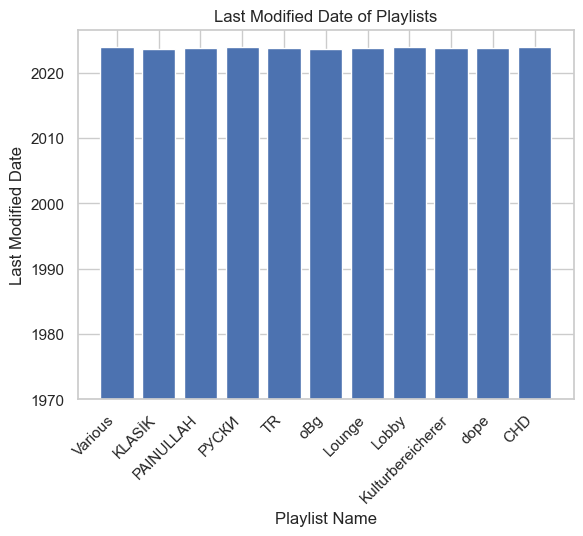

In [109]:
df['lastModifiedDate'] = pd.to_datetime(df['lastModifiedDate'])


plt.bar(df['name'], df['lastModifiedDate'])
plt.xlabel('Playlist Name')
plt.ylabel('Last Modified Date')
plt.title('Last Modified Date of Playlists')
plt.xticks(rotation=45, ha='right')
plt.show()

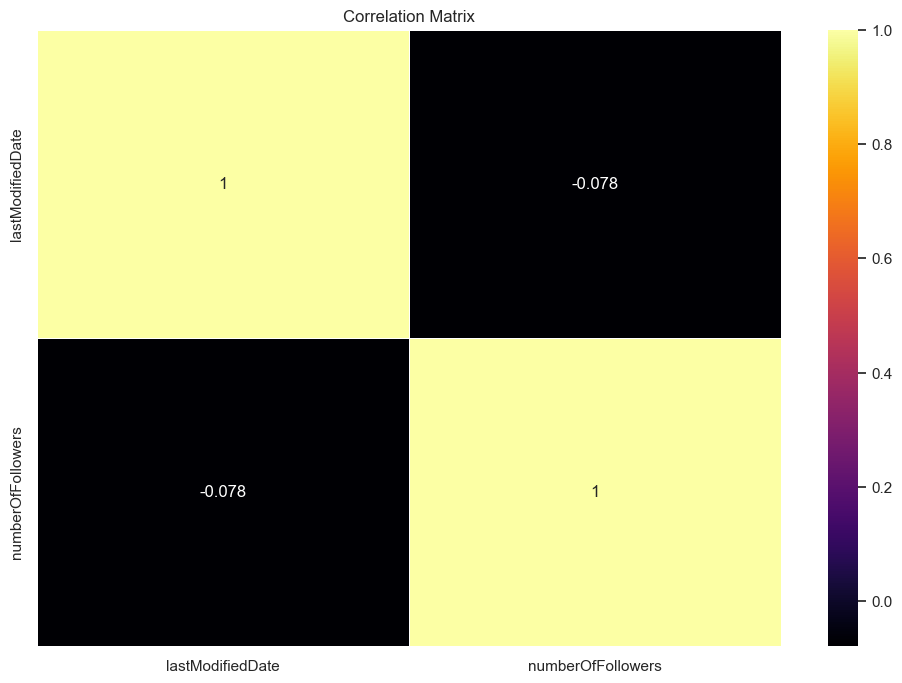

In [116]:
df[['lastModifiedDate']] = df[['lastModifiedDate']].apply(pd.to_numeric)

numerical_columns = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=.5, ax=ax)

plt.title("Correlation Matrix")
plt.show()